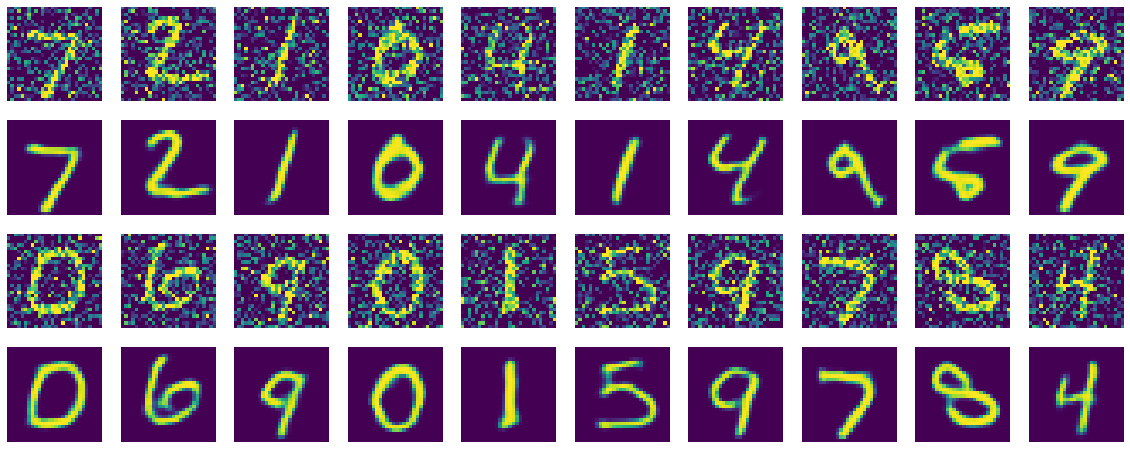

In [15]:
from keras.models import load_model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(_, _), (x_test, _) = mnist.load_data()
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(len(x_test),28,28,1)

noise_factor = 0.4
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = x_test_noisy.clip(0., 1.)

autoencoder = load_model('vae_mnist.h5')
decoded_imgs = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20,8))
for i in range(n):
    ax = plt.subplot(4, n/2, i+1+int(i/10)*n/2)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.axis('off')
    
    ax = plt.subplot(4, n/2, i+1+n/2+int(i/10)*n/2)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.axis('off')

plt.show()